# **Rodrigo_Mesquita_DR1_TP3**
### **Inteligência Artificial: Model LifeCycle [24E1_1]**

Link Notebook: https://colab.research.google.com/drive/1eaGEWlhtwSPRdOoSguIkkZbz-VuHxDvB?usp=sharing

# 1.Explique, com suas palavras, os conceitos de Underfitting e Overfitting. Quais os impactos de cada um deles no processo de modelagem?

Underfitting é quando o modelo é muito simples e não consegue compreender os padrões existentes nos dados, resultando em baixo desempenho. Já o overfitting acontece quando o modelo se ajusta demais aos dados de treino, prejudicando sua capacidade de generalização para novos dados.

# 2.Carregue o dataset já conhecido "TP2_Penguins" para um dataframe utilizando linguagem Python, e execute as seguintes transformações, utilizando a biblioteca Pandas:


In [19]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [2]:
df_penguins = pd.read_csv('/content/drive/MyDrive/Faculdade/Colab Notebooks/Datasets/TP2_Penguins.csv')

### a.Elimine as variáveis "island", "sex" e "year".


In [3]:
df_penguins = df_penguins.drop(['island', 'sex', 'year'], axis=1)

### b.Elimine observações que contenham dados ausentes (NA).


In [4]:
df_penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
df_penguins = df_penguins.dropna()

### c.Transforme-o para que ele tenha apenas duas categorias-alvo, “Gentoo” e “No-Gentoo”.


In [6]:
df_penguins['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [7]:
mapeamento = {'Adelie': 'No-Gentoo', 'Gentoo': 'Gentoo', 'Chinstrap': 'No-Gentoo'}
df_penguins['species'] = df_penguins['species'] .map(mapeamento);
df_penguins['species'].unique()

<ipython-input-7-157a19d3f661>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_penguins['species'] = df_penguins['species'] .map(mapeamento);


array(['No-Gentoo', 'Gentoo'], dtype=object)

###d.Recodifique a variável-alvo para representar a categoria "Gentoo" como 1 e "No-Gentoo" como 0.


In [8]:
mapeamento = {'Gentoo':1, 'No-Gentoo':0}
df_penguins['species'] = df_penguins['species'] .map(mapeamento);
df_penguins['species'].unique()

<ipython-input-8-47a60ccd7a1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_penguins['species'] = df_penguins['species'] .map(mapeamento);


array([0, 1])

###e.Separe o dataframe resultante em Treino-Teste, utilizando a proporção 75-25%.

In [9]:
x = df_penguins.drop(['species'], axis=1)
y = df_penguins['species']

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=20)

###f.A partir do dataframe totalmente transformado, aplique um modelo KNN, identifique o melhor K a ser utilizado no problema. Justifique sua resposta.


Eu escolheria k=21, pois a partir deste valor a acurácia de treino e teste alcançam um platô, mostrando consistência no resultado e tendo um resultado excelênte 93% para treino e 91% para teste.

In [61]:
valor_k = list(range(3,120,2))
train_yhat = []
train_acc = []
train_scores = []
test_yhat = []
test_acc = []
test_scores = []

for k in valor_k:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(x_train, y_train.values.ravel())

    #Avaliar score com dados de treino
    train_yhat = knn.predict(x_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)

    #Avaliar score com dados de teste
    test_yhat = knn.predict(x_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)

    print('>%d, ACC treino: %.3f, ACC teste: %.3f' %(k, train_acc, test_acc))

>3, ACC treino: 0.969, ACC teste: 0.907
>5, ACC treino: 0.957, ACC teste: 0.930
>7, ACC treino: 0.938, ACC teste: 0.919
>9, ACC treino: 0.941, ACC teste: 0.919
>11, ACC treino: 0.957, ACC teste: 0.930
>13, ACC treino: 0.957, ACC teste: 0.942
>15, ACC treino: 0.934, ACC teste: 0.919
>17, ACC treino: 0.945, ACC teste: 0.930
>19, ACC treino: 0.945, ACC teste: 0.907
>21, ACC treino: 0.930, ACC teste: 0.919
>23, ACC treino: 0.930, ACC teste: 0.930
>25, ACC treino: 0.934, ACC teste: 0.919
>27, ACC treino: 0.930, ACC teste: 0.919
>29, ACC treino: 0.930, ACC teste: 0.919
>31, ACC treino: 0.922, ACC teste: 0.919
>33, ACC treino: 0.926, ACC teste: 0.919
>35, ACC treino: 0.926, ACC teste: 0.919
>37, ACC treino: 0.926, ACC teste: 0.919
>39, ACC treino: 0.930, ACC teste: 0.919
>41, ACC treino: 0.926, ACC teste: 0.919
>43, ACC treino: 0.926, ACC teste: 0.919
>45, ACC treino: 0.926, ACC teste: 0.919
>47, ACC treino: 0.930, ACC teste: 0.919
>49, ACC treino: 0.926, ACC teste: 0.919
>51, ACC treino: 0.9

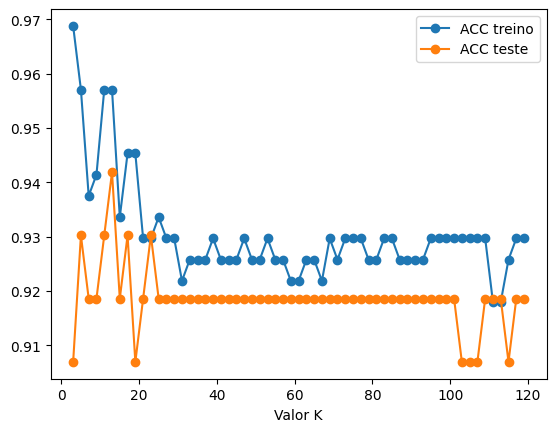

In [62]:
plt.plot(valor_k, train_scores, '-o', label='ACC treino')
plt.plot(valor_k, test_scores, '-o', label='ACC teste')
plt.xlabel('Valor K')
plt.legend()

# 3.A partir do dataframe totalmente transformado do item 2, execute o modelo com o melhor valor de K encontrado, e apresente sua acurácia.

In [66]:
knn = KNeighborsClassifier(n_neighbors=21, metric='euclidean')
knn.fit(x_train, y_train.values.ravel())
y_pred = knn.predict(x_test)
score = np.mean(y_test.values.ravel() != y_pred)
acuracia = metrics.accuracy_score(y_test.values.ravel(),y_pred)

In [67]:
print("score:",score)
print("acuracia:",acuracia)

score: 0.08139534883720931
acuracia: 0.9186046511627907


# 4.Utilizando a mesma base preparada do item 2, aplique agora uma abordagem de validação cruzada, com 5 dobras. Apresente a acurácia do seu modelo.

In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [69]:
knn = KNeighborsClassifier(n_neighbors=21, metric='euclidean')
kf = KFold(n_splits=5)
scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv=kf, scoring = 'accuracy')
acuracia_media = scores.mean()

In [70]:
print('acuracia média:', acuracia)

acuracia média: 0.9186046511627907
